In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import pymongo



In [8]:
# Conectar ao MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Selecionar o banco de dados e a coleção
db = client["dnc"]
collection = db["weather"]

In [9]:
# Buscar todos os documentos da coleção
data = list(collection.find())

# Converter as strings de data e hora para objetos datetime
for record in data:
    record['dt'] = datetime.strptime(record['dt'], "%Y-%m-%d %H:%M:%S")
    record['sunrise'] = datetime.strptime(record['sunrise'], "%Y-%m-%d %H:%M:%S")
    record['sunset'] = datetime.strptime(record['sunset'], "%Y-%m-%d %H:%M:%S")

# Converter os documentos em um DataFrame
df = pd.DataFrame(data)

# Mostrar o DataFrame
df.head()

,_id,hashId,city,clouds_all,country,dt,feels_like,humidity,pressure,sunrise,sunset,temp_max,temp_min,temperature,visibility,weather_description,weather_main,wind_deg,wind_speed
0,666b97c7cd1b55a3bff45b6a,3c8fef62ef77f5372ed0d363873a5a5a,São Paulo,0,BR,2024-06-14 01:00:08,291.92,63,1023,2024-06-13 09:45:55,2024-06-13 20:27:38,294.51,289.09,292.30,10000,clear sky,Clear,139,1.79
1,666b97c7cd1b55a3bff45b6c,c7e30465e55c5a0b241062eb7c83676b,Rio de Janeiro,0,BR,2024-06-14 01:02:09,296.59,77,1017,2024-06-13 09:30:53,2024-06-13 20:15:14,297.13,291.12,296.22,10000,clear sky,Clear,90,1.54
2,666b97c7cd1b55a3bff45b6e,24c37eb5d2ef507c3d07944d7441d74b,Brasília,0,BR,2024-06-14 01:01:36,293.54,68,1022,2024-06-13 09:36:03,2024-06-13 20:47:51,293.66,290.16,293.66,10000,clear sky,Clear,100,3.09
3,666b97c7cd1b55a3bff45b70,dc461f2116722be2fd79db2f3964d2ff,Curitiba,0,BR,2024-06-14 00:59:48,289.27,68,1018,2024-06-13 10:00:36,2024-06-13 20:34:11,290.18,289.23,289.78,10000,clear sky,Clear,40,2.06
4,666b9804cd1b55a3bff45bcc,8383cd4a617da07e622990d428e7befd,São José dos Campos,0,BR,2024-06-14 01:07:27,289.11,77,1021,2024-06-13 09:42:10,2024-06-13 20:25:23,289.42,289.42,289.42,10000,clear sky,Clear,0,0.51


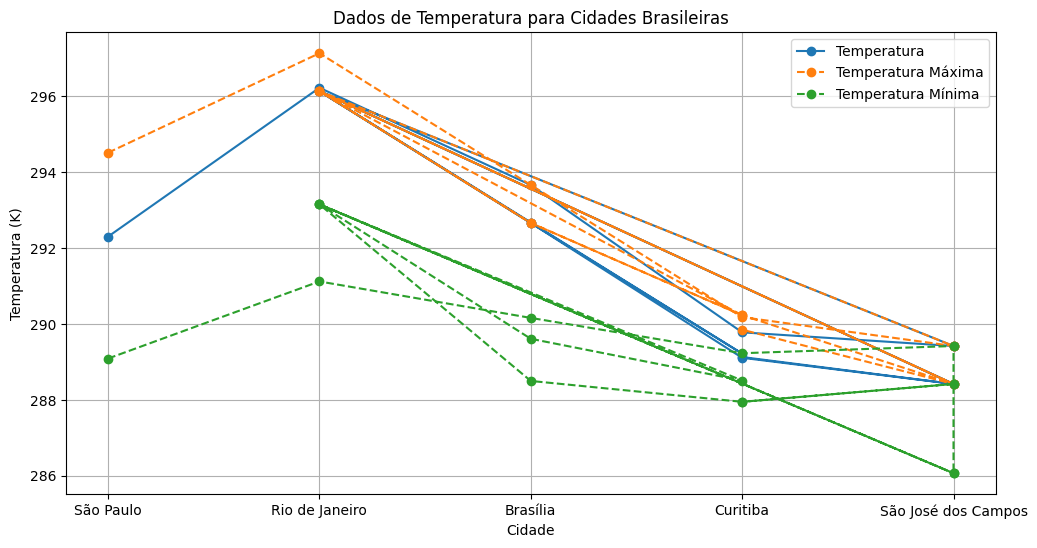

In [11]:
# Plotar dados de temperatura
plt.figure(figsize=(12, 6))
plt.plot(df['city'], df['temperature'], marker='o', label='Temperatura')
plt.plot(df['city'], df['temp_max'], marker='o', linestyle='--', label='Temperatura Máxima')
plt.plot(df['city'], df['temp_min'], marker='o', linestyle='--', label='Temperatura Mínima')
plt.title('Dados de Temperatura para Cidades Brasileiras')
plt.xlabel('Cidade')
plt.ylabel('Temperatura (K)')
plt.legend()
plt.grid(True)
plt.show()

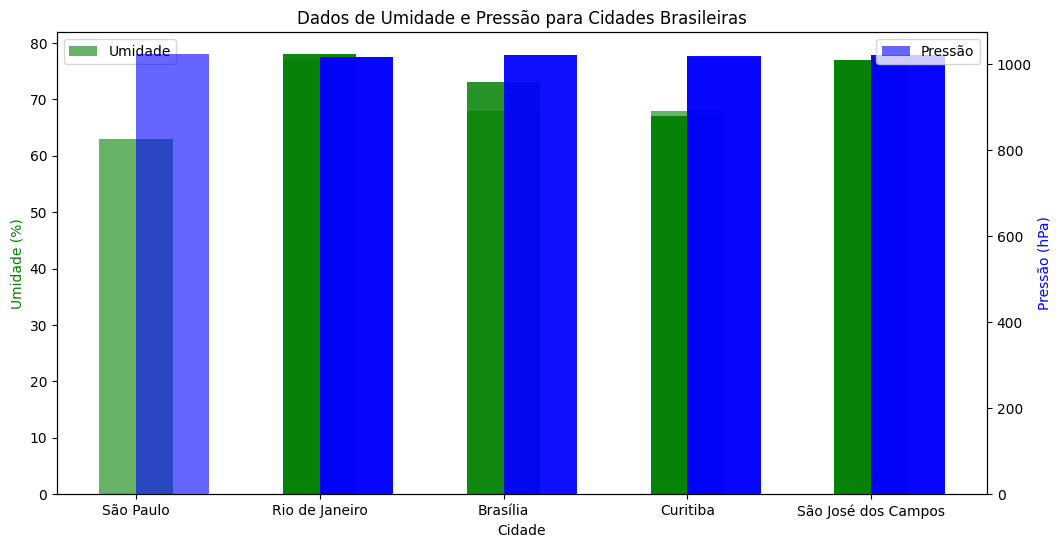

In [12]:
# Plotar dados de umidade e pressão
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(df['city'], df['humidity'], color='g', alpha=0.6, width=0.4, align='center', label='Umidade')
ax2.bar(df['city'], df['pressure'], color='b', alpha=0.6, width=0.4, align='edge', label='Pressão')

ax1.set_xlabel('Cidade')
ax1.set_ylabel('Umidade (%)', color='g')
ax2.set_ylabel('Pressão (hPa)', color='b')
plt.title('Dados de Umidade e Pressão para Cidades Brasileiras')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

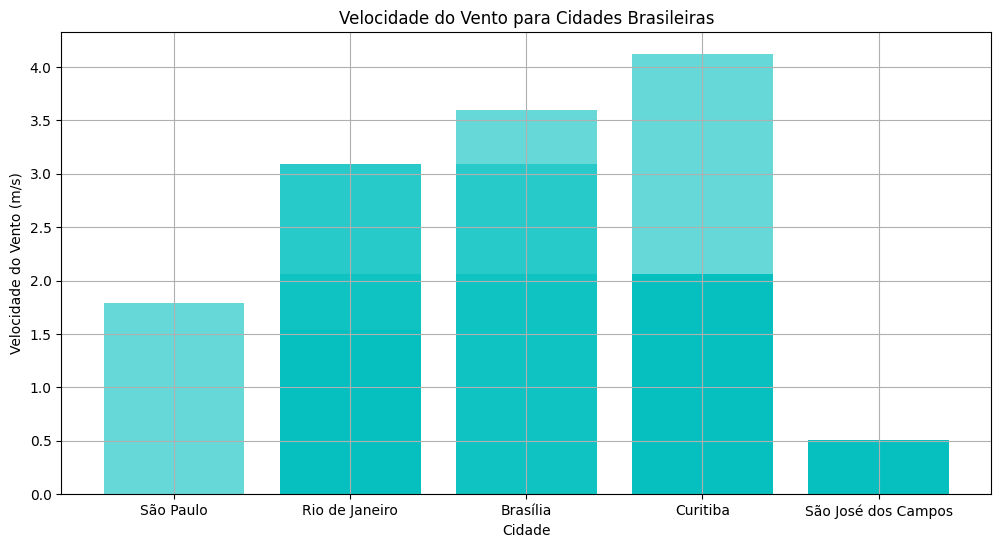

In [13]:
# Plotar dados de velocidade do vento
plt.figure(figsize=(12, 6))
plt.bar(df['city'], df['wind_speed'], color='c', alpha=0.6)
plt.title('Velocidade do Vento para Cidades Brasileiras')
plt.xlabel('Cidade')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.show()